In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [8]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

In [13]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [15]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)


In [16]:
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

Logistic Regression Accuracy: 0.8155
Random Forest Accuracy: 0.7970


In [17]:
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [18]:
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

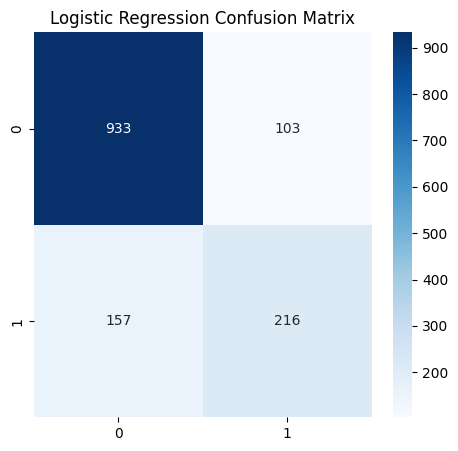

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

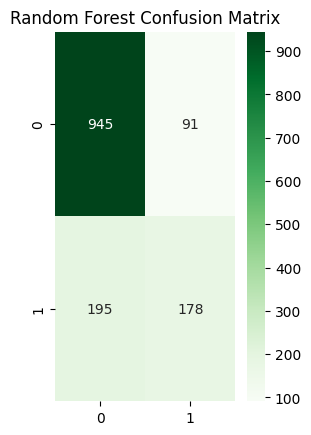

In [20]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

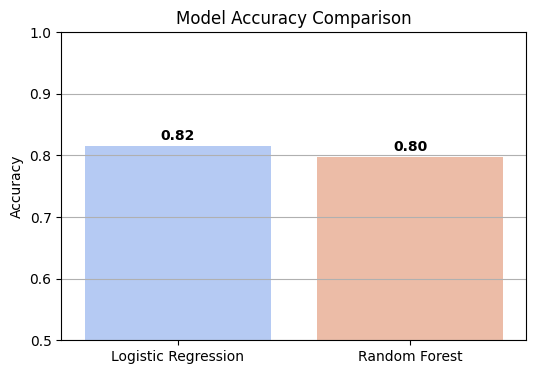

In [25]:
# Accuracy Comparison Bar Plot
model_names = ['Logistic Regression', 'Random Forest']
accuracies = [acc_lr, acc_rf]

plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracies, palette='coolwarm', hue=model_names, legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')
plt.show()

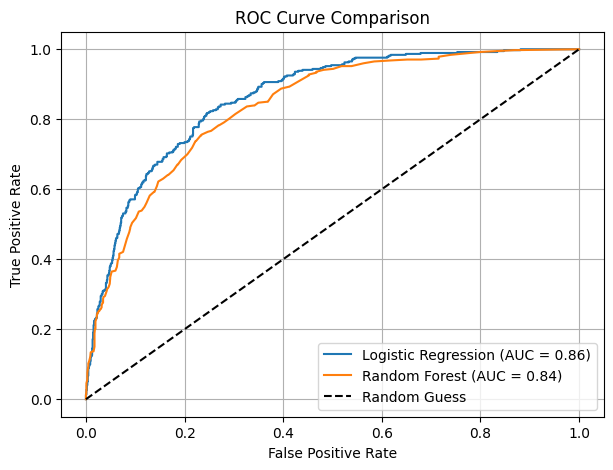

In [23]:
from sklearn.metrics import roc_curve, auc
# Probabilities
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
# AUC Scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(7, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

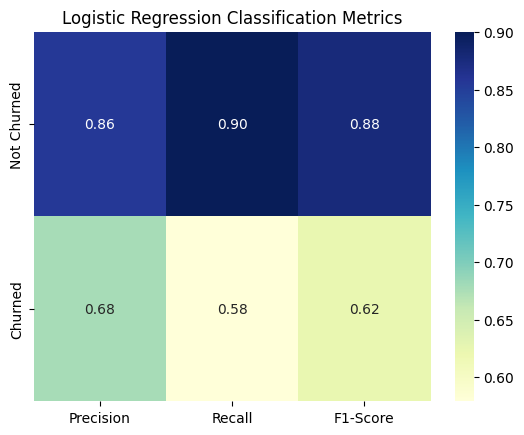

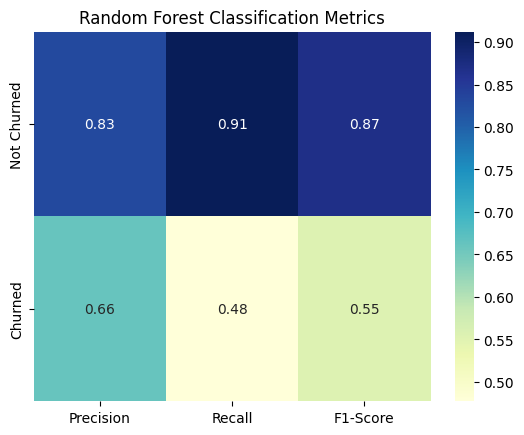

In [24]:
from sklearn.metrics import precision_recall_fscore_support

def plot_classification_heatmap(y_true, y_pred, model_name):
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred)
    metrics_df = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
        'F1-Score': fscore
    }, index=['Not Churned', 'Churned'])

    sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"{model_name} Classification Metrics")
    plt.show()

# Logistic Regression heatmap
plot_classification_heatmap(y_test, y_pred_lr, "Logistic Regression")

# Random Forest heatmap
plot_classification_heatmap(y_test, y_pred_rf, "Random Forest")
